# Support Vector Machines

The ***Maximal Margin Classifier*** is a method of selecting the class seperator. It basically chooses a spot that leaves the most margin between classes.

In 1D, it would be a point. In 2D, it would be a line. In 3D, it would be a flat plane.

What happens if classes are not perfectly separable? We are unable to separate without allowing for misclassifications.

We use a bias-variance trade-off: decide how much class noise we want to consider.

***Soft Margin***: Allows for misclassification inside the margins. This is basically the same as a *support vector classifier*.

Support classifiers are used when the classes are easily separable but when they are more difficult to separate then we use a ***support vector machine***.

**SVMs**: use *kernels* to project data to a higher dimension in order to use a hyperplane in the higher dimension to separate the data.

The ***kernel trick*** avoids recomputing the points onto a higher plane.

Makes use of the inner/dot product of the vectors.

A kernel is a function that quantifies the similarity of two observations.

### Coding part

In [1]:
# we'll be using a function from a .py file to visually see the margins
# CODE SOURCE IS DIRECTLY FROM DOCUMENTATION
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/modeedna/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/mouse_viral_study.csv')

In [4]:
# data is for a study on mice and doses of medicines (did virus disappear)
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


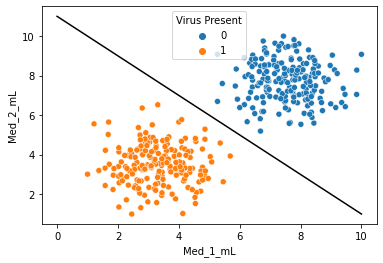

In [10]:
# see medication amounts vs presence of virus
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

# HYPERPLANE (2d line)
x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b

plt.plot(x,y,'black')

In [11]:
from sklearn.svm import SVC

In [47]:
#help(SVC)

In [15]:
y = df['Virus Present']
X = df.drop('Virus Present', axis=1)

In [16]:
# create the model
# kernel hyperparameter selects the type of kernel
# C is a measurement of how many points you allow to be within the margin
# C value is inverse, so a small number means you allow a lot of points into the margin
model = SVC(kernel='linear', C=1000)

In [17]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

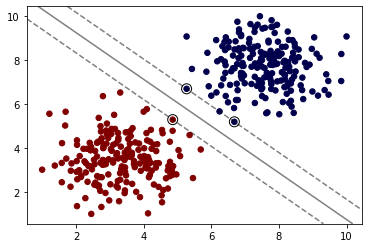

In [20]:
# using function we copied from another notebook
plot_svm_boundary(model,X,y)

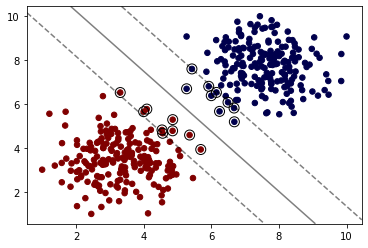

In [21]:
# recreate model with a smaller C
model = SVC(kernel='linear', C =0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

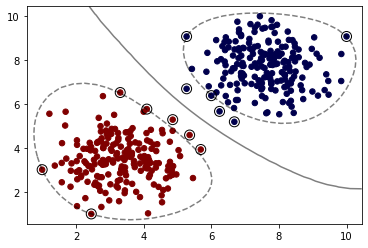

In [32]:
# rbf kernel is the default kernel
# if using rbf, we need to understand the gamma parameter
# gamma defines how much influence a single training example has (the higher the gamma the higher the probability of overfitting)
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X,y)
plot_svm_boundary(model,X,y)

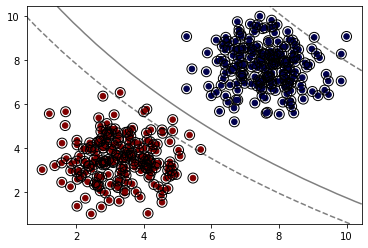

In [33]:
# sigmoid kernel
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

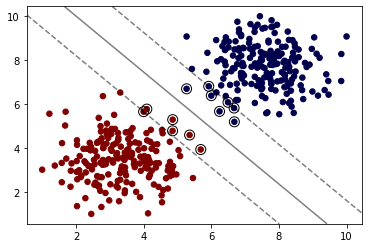

In [40]:
# polynomial kernel
model = SVC(kernel='poly', degree=1, C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

### Using GridSearch with SVC

In [41]:
# grid search
from sklearn.model_selection import GridSearchCV

In [42]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [43]:
grid = GridSearchCV(svm, param_grid)

In [45]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [46]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

### Support vector regression

Predict a continuous label given a set of features.

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('/Users/modeedna/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cement_slump.csv')

In [52]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


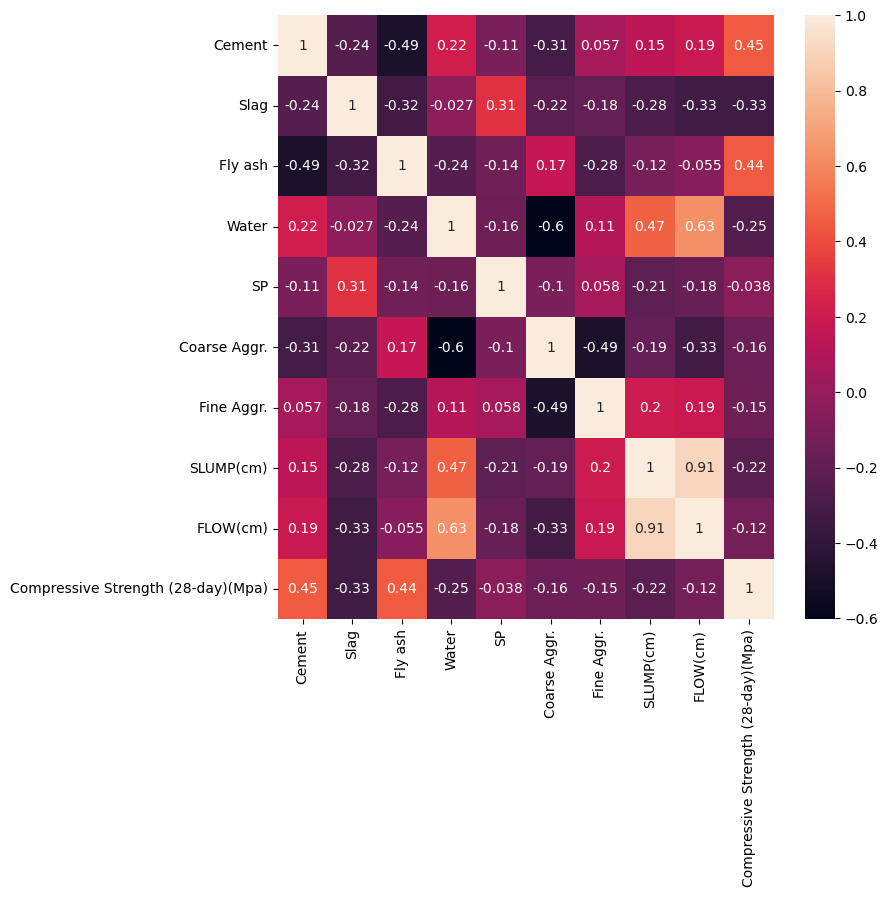

In [54]:
plt.figure(figsize=(8,8), dpi=100)
sns.heatmap(df.corr(),annot=True);

In [55]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [56]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [62]:
from sklearn.svm import SVR, LinearSVR

In [63]:
base_model = SVR()

In [64]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [65]:
base_preds = base_model.predict(scaled_X_test)

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [67]:
mean_absolute_error(y_test,base_preds)

5.236902091259179

In [68]:
np.sqrt(mean_squared_error(y_test, base_preds))

6.695914838327134

In [69]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'], 'gamma':['scale','auto'],'degree':[2,3,4],'epsilon':[0,0.01,0.1,0.5,1,2]}

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
svr = SVR()

In [72]:
grid = GridSearchCV(svr,param_grid)

In [73]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [74]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [75]:
grid_preds = grid.predict(scaled_X_test)

In [76]:
mean_absolute_error(y_test,grid_preds)

2.5128012210761708

In [78]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.1782103051198094